# Marginal Pairplots

In [1]:
from experiments_utils.fetching import ResultsManager

In [2]:
r = ResultsManager("iclr_experiments_3")

In [ ]:
ret_sunle_50000 = r.fetch_one_result(num_samples=(50000, *10 * (10000,))).result

In [4]:
ret_sunle_100000 = r.fetch_one_result(num_samples=(100000, *10 * (10000,))).result

In [8]:
ret_sunle = ret_sunle_50000

In [9]:
import jax.numpy as jnp
def reconstruct_theta(theta, theta_ij, i, j):
    theta = theta.at[i].set(theta_ij[0])
    return theta.at[j].set(theta_ij[1])


def make_renormalized_d_cond(d, theta_cond, posterior):
    def renormalized_d(tij):
        return d(posterior.z_transform.inv(reconstruct_theta(theta_cond, tij, i, j))[(i, j),])
    return renormalized_d

def make_renormalized_d(d, posterior, i, j):
    def renormalized_d(tij):
        thet = reconstruct_theta(jnp.zeros(posterior.event_shape), tij, i, j)
        return d(posterior.z_transform.inv(reconstruct_theta(jnp.zeros(posterior.event_shape), tij, i, j))[(i, j),])
    return renormalized_d

# from density_utils.plotting import make_unnormalized_kde_density
# d = make_unnormalized_kde_density(results.samples.xs, bandwidth=0.05)
# renormalized_d = make_renormalized_d(d, theta_cond)
# from jax import vmap
# tij_reconstruted = posterior.z_transform(vmap(lambda tij: reconstruct_theta(posterior.z_transform.inv(theta_cond), tij, i, j))(results.samples.xs[:, :]))[:, (i, j)]
# return renormalized_d, tij_reconstruted

In [11]:
srr = ret_sunle.train_results.single_round_results

In [12]:
posterior_samples = srr[-1].posterior_samples
posterior_samples_z_scored=srr[-1].posterior.z_transform.inv(posterior_samples)

In [11]:
from density_utils.plotting import make_unnormalized_kde_density

In [12]:
import numpy as np
lims = np.asarray([[ 0.0000000e+00,  5.0000000e+02],
       [ 0.0000000e+00,  7.5000000e+00],
       [ 0.0000000e+00,  8.0000000e+00],
       [ 0.0000000e+00,  6.0000000e+01],
       [ 0.0000000e+00,  1.5000000e+01],
       [ 2.5000000e+01,  1.5000000e+02],
       [ 0.0000000e+00,  2.0000000e-02],
       [ 0.0000000e+00,  9.9999998e-03],
       [ 0.0000000e+00,  2.0000000e+02],
       [ 0.0000000e+00,  2.5000000e+00],
       [ 2.0000000e+00,  1.2000000e+01],
       [ 1.0000000e+01,  6.0000000e+01],
       [ 0.0000000e+00,  1.0000000e+01],
       [ 0.0000000e+00,  1.2500000e+02],
       [ 0.0000000e+00,  5.9999999e-02],
       [ 9.9999998e-03,  3.9999999e-02],
       [ 0.0000000e+00,  6.0000000e+02],
       [ 0.0000000e+00,  1.2500000e+01],
       [ 0.0000000e+00,  4.0000000e+00],
       [ 3.0000000e+01,  6.0000000e+01],
       [ 0.0000000e+00,  5.0000000e+00],
       [ 5.0000000e+01,  1.5000000e+02],
       [ 0.0000000e+00,  5.9999999e-02],
       [ 0.0000000e+00,  3.9999999e-02],
       [-1.8420681e+01, -4.6051702e+00],
       [-1.8420681e+01, -6.9077554e+00],
       [-1.8420681e+01, -6.9077554e+00],
       [-1.8420681e+01, -6.9077554e+00],
       [-1.8420681e+01, -6.9077554e+00],
       [-1.8420681e+01, -6.9077554e+00],
       [-1.8420681e+01, -6.9077554e+00]], dtype=np.float32)

In [13]:
labels = [
    "AB-Na",
    "AB-CaT",
    "AB-CaS",
    "AB-A",
    "AB-KCa",
    "AB-Kd",
    "AB-H",
    "AB-leak",
    "LP-Na",
    "LP-CaT",
    "LP-CaS",
    "LP-A",
    "LP-KCa",
    "LP-Kd",
    "LP-H",
    "LP-leak",
    "PY-Na",
    "PY-CaT",
    "PY-CaS",
    "PY-A",
    "PY-KCa",
    "PY-Kd",
    "PY-H",
    "PY-leak",
    "AB-LP",
    "PD-LP",
    "AB-PY",
    "PD-PY",
    "LP-PD",
    "LP-PY",
    "PY-LP",
]


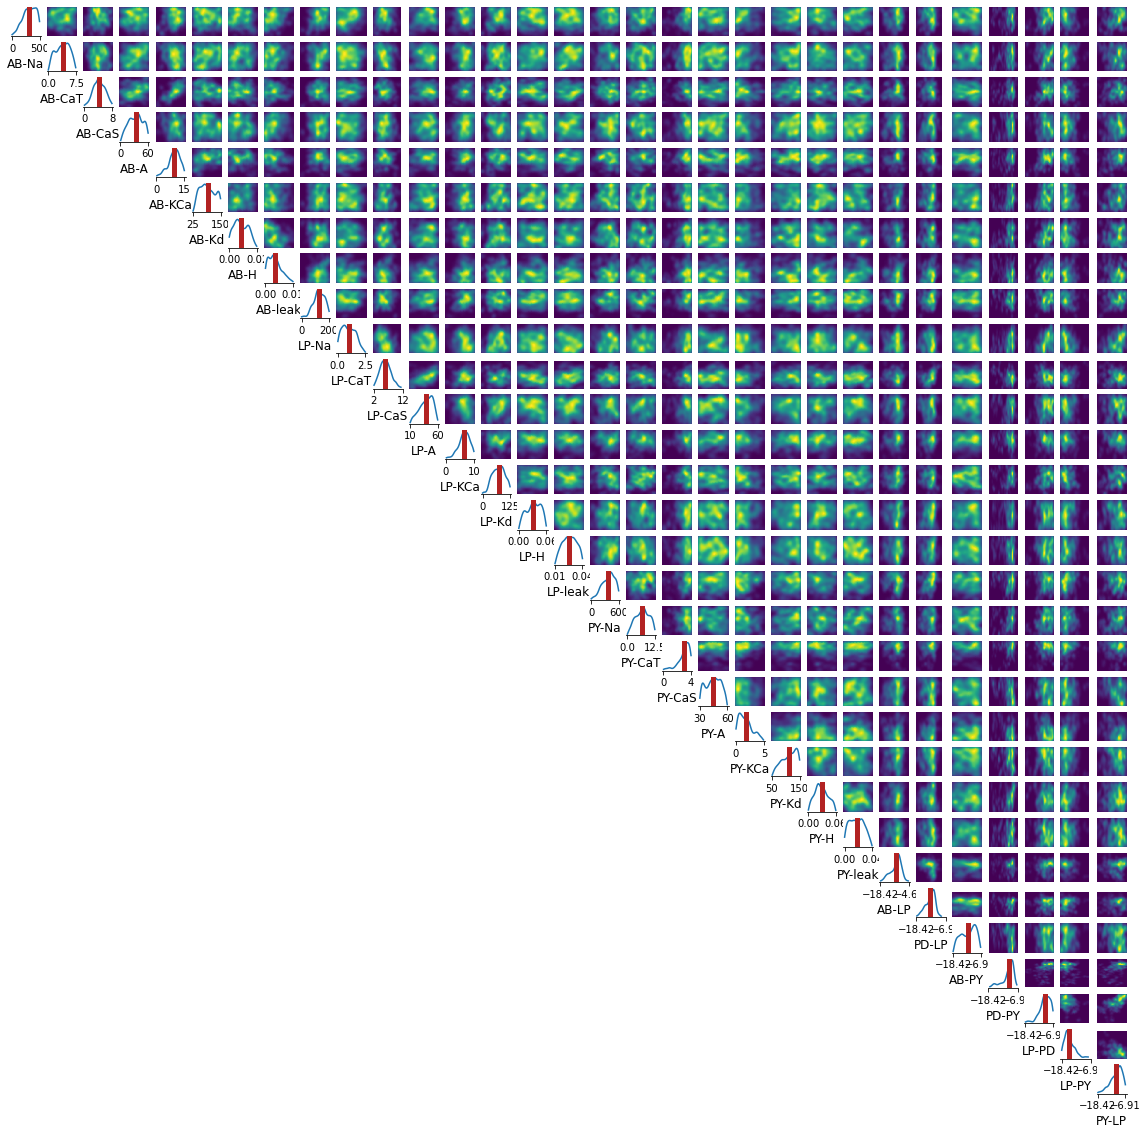

In [30]:
from density_utils.plotting import plot_densities
import matplotlib.pyplot as plt
from scipy import stats
I_MAX = 31
f, axs = plt.subplots(ncols=I_MAX, nrows=I_MAX, figsize=(20, 20))
for i in range(0, I_MAX):
    for j in range(0, I_MAX):
        axs[i, j].axis('off')
        if j < i:
            continue
            
        if i == j:
            kde = stats.gaussian_kde(posterior_samples[:,  i])
            import jax.numpy as jnp
            linsp  =  jnp.linspace(jnp.min(posterior_samples[:,  i]), jnp.max(posterior_samples[:,  i]))
            axs[i,i].plot(linsp, kde(linsp))
            axs[i, j].axis('on')
            axs[i, j].get_yaxis().set_visible(False)
            axs[i, j].set_xlabel(labels[i], fontsize=12)
            
            right_side = axs[i, i].spines["right"].set_visible(False)
            right_side = axs[i, i].spines["left"].set_visible(False)
            right_side = axs[i, i].spines["top"].set_visible(False)
            # axs[i, i].locator_params(axis="x", nbins=1) 
            # axs[i, i].locator_params(axis="y", nbins=1) 
            axs[i, i].set_xticks(lims[i])
            axs[i, i].axvline(posterior_samples.mean(axis=0)[i], linewidth=5, color="firebrick")
            # right_side.set_visible(False)
            # axs[i, j].grid('off')
            # axs[i, j].set_yticklabels([])
        else:
            dens = make_renormalized_d(make_unnormalized_kde_density(posterior_samples_z_scored[:, (j, i)], bandwidth=0.3), ret_sunle[-1].posterior, j, i)
            plot_densities({'d': dens}, 
                           bounds=((posterior_samples.min(axis=0)[j], posterior_samples.max(axis=0)[j]),
                                   (posterior_samples.min(axis=0)[i], posterior_samples.max(axis=0)[i])),
                           axs=[axs[i, j]]
                          )
            axs[i, j].set_xlim(lims[j])
            axs[i, j].set_ylim(lims[i])

In [32]:
f.savefig("figures/pyloric_pairwise_marginals.png", bbox_inches='tight',dpi=300)